<a href="https://colab.research.google.com/github/malisabihaoglu/Akbank-GlobalAIHubBootcamp/blob/main/Melbourne_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Gerekli kütüphaneleri içe aktarılması
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import zscore

In [53]:
melbourne = pd.read_csv("melb_data.csv")

#Temel veri setini bozmamak için melb_data.csv dosyasını kopyalayalım.
df=melbourne.copy()
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [54]:
#Veri setinde boş değerlerin varlığını kontrol edelim.
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [55]:
#Veri türlerini, eksik verileri ve bellek kullanımını görüntüleyelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [56]:
#Temel istatistikleri görüntüleyelim ve sayısal değişkenlerin dağılımlarını anlayalım.
df.describe

<bound method NDFrame.describe of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/

In [57]:
df['Price']

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [58]:
melbourne['Price'].mean()

1075684.079455081

In [59]:
df['Price'].value_counts()

1100000.0    113
1300000.0    109
650000.0     109
800000.0     109
600000.0     104
            ... 
1928000.0      1
2236000.0      1
601500.0       1
550500.0       1
1323000.0      1
Name: Price, Length: 2204, dtype: int64

In [60]:
#İstatistikleri görüntüleyelim.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [61]:
df.corr(numeric_only = True)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [62]:
#Veri seti hakkında bilgiler
shape = df.shape
size = df.size
ndim = df.ndim

print("Shape: {}".format(shape))
print("Size: {}".format(size))
print("Dimension: {}".format(ndim))

Shape: (13580, 21)
Size: 285180
Dimension: 2


In [63]:
#duplike olan veri sayısını buluyoruz
df.duplicated().sum()

0

In [64]:
df.dropna(subset=['Price'], inplace=True)

In [65]:
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [66]:
#Kategorik ve numerik verileri belirleme
cat_cols = df.select_dtypes(['object']).columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in cat_cols:
    df[column] = df[column].astype('category')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         13580 non-null  category
 1   Address        13580 non-null  category
 2   Rooms          13580 non-null  int64   
 3   Type           13580 non-null  category
 4   Price          13580 non-null  float64 
 5   Method         13580 non-null  category
 6   SellerG        13580 non-null  category
 7   Date           13580 non-null  category
 8   Distance       13580 non-null  float64 
 9   Postcode       13580 non-null  float64 
 10  Bedroom2       13580 non-null  float64 
 11  Bathroom       13580 non-null  float64 
 12  Car            13518 non-null  float64 
 13  Landsize       13580 non-null  float64 
 14  BuildingArea   7130 non-null   float64 
 15  YearBuilt      8205 non-null   float64 
 16  CouncilArea    12211 non-null  category
 17  Lattitude      13580 non-null  

In [67]:
from scipy.stats import zscore

columns_to_observe = ['Landsize','BuildingArea']
z_scores = {} # Her sütun için z-score'ları saklayacak boş dictionary

for column in columns_to_observe: # columns_to_observe'daki sütunlar için döngü
  z_score = zscore(df[column])
  z_scores[column] = z_score

threshold = 3 # Eşik değeri

outliers = {} # Outlier değerleri tutacak boş dictionary

for column in columns_to_observe:
  outlier = np.abs(z_scores[column]) > threshold
  outliers[column] = outlier

# Tüm Outlierları birleştirecek boş seri
detected_outliers = pd.Series([False] * len(df), index=df.index)

for col in columns_to_observe:
  detected_outliers |= outliers[col]

# Outlierların sayısı ve verisetinden çıkartılması
sum(detected_outliers)
df = df[~detected_outliers]

In [68]:
## Eksik değerleri doldurma

for column in cat_cols:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

for column in num_cols:
  df[column].fillna(df[column].mean(), inplace=True)


<ipython-input-68-a97569209e0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode().iloc[0])
<ipython-input-68-a97569209e0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode().iloc[0])
<ipython-input-68-a97569209e0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [69]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [70]:
## Eksik değerleri doldurma

for column in cat_cols:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

for column in num_cols:
  df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-70-3ad4178e6ada>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode().iloc[0])
<ipython-input-70-3ad4178e6ada>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode().iloc[0])
<ipython-input-70-3ad4178e6ada>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [71]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

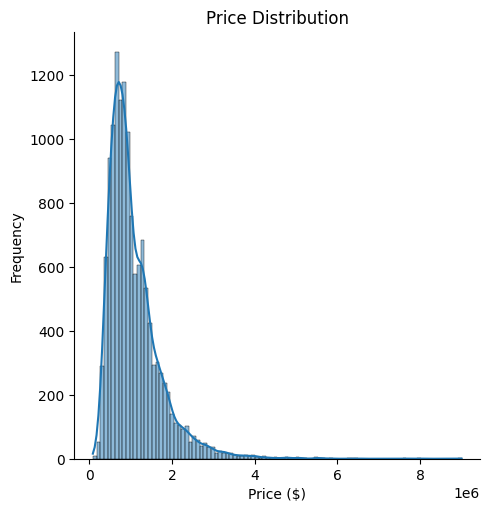

In [72]:
sns.displot(df['Price'], kde=True, bins=100)

plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

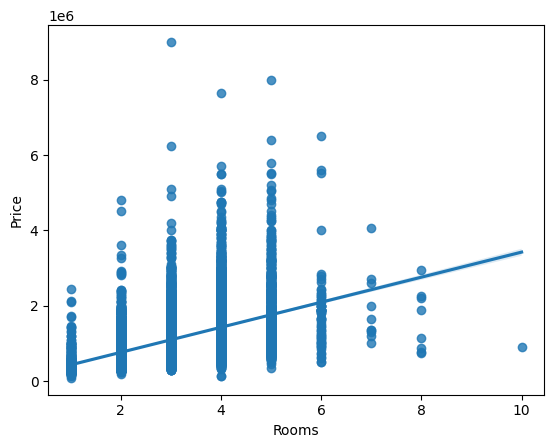

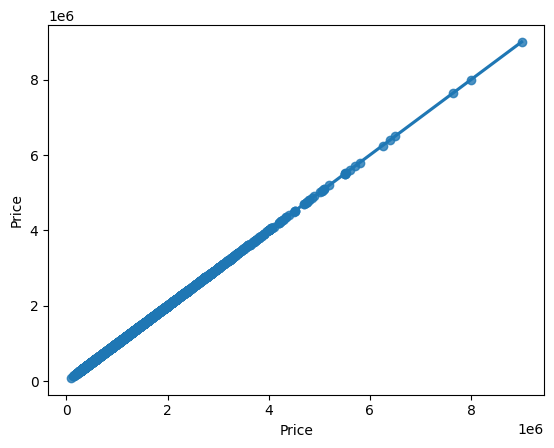

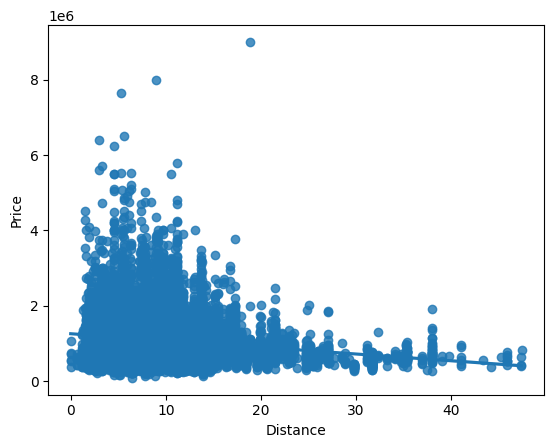

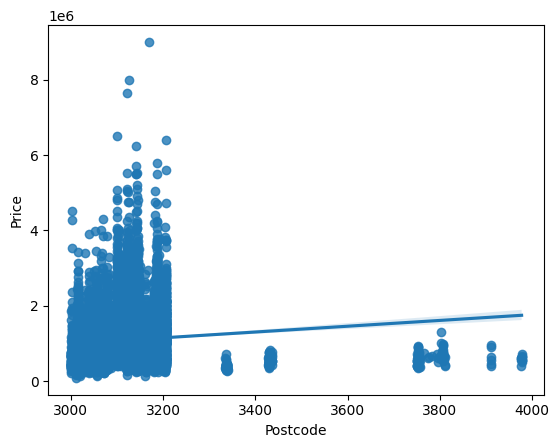

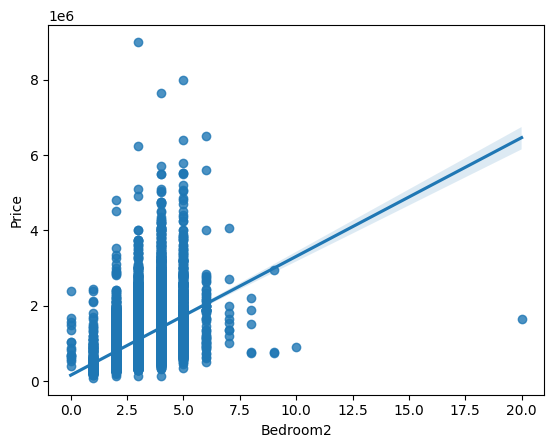

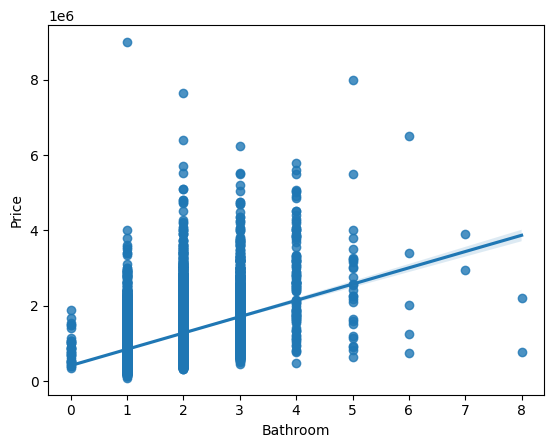

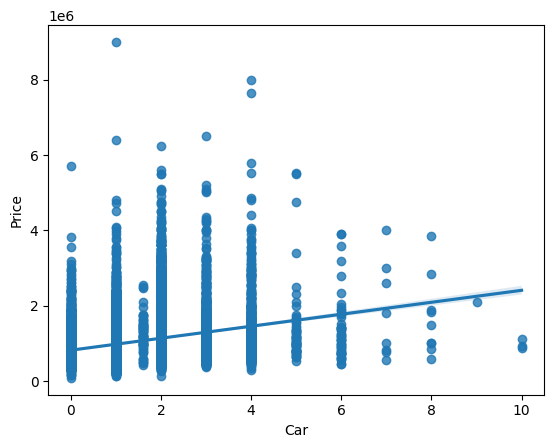

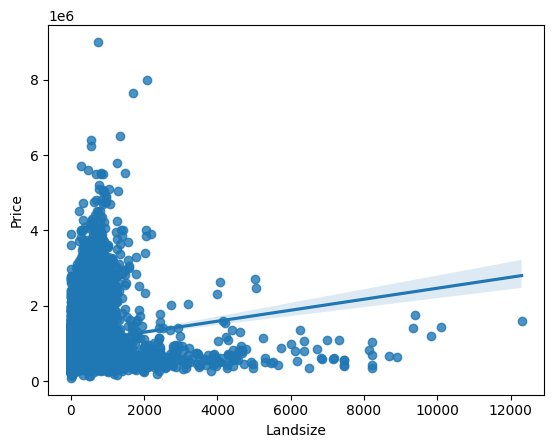

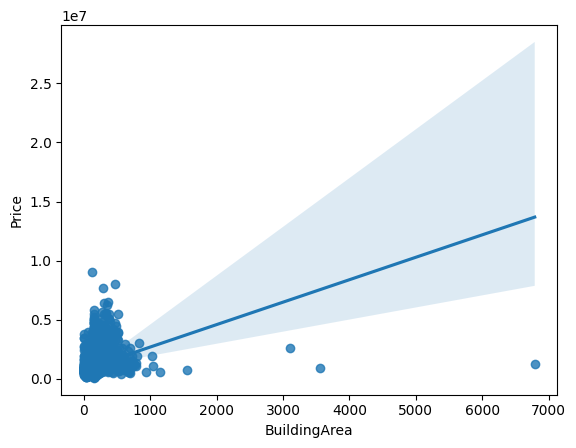

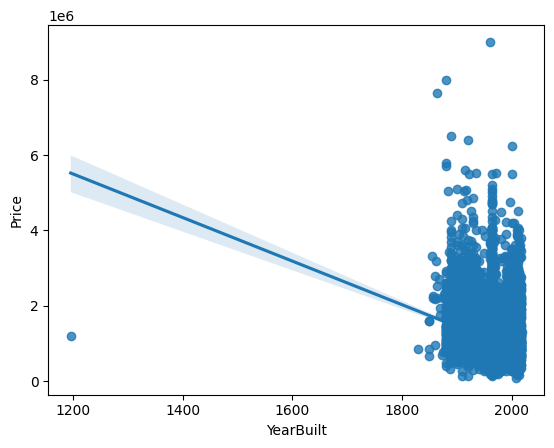

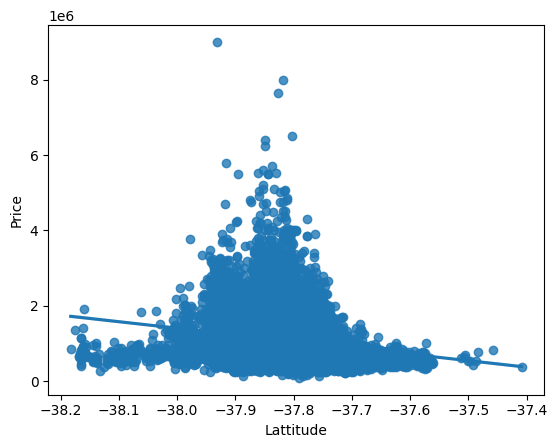

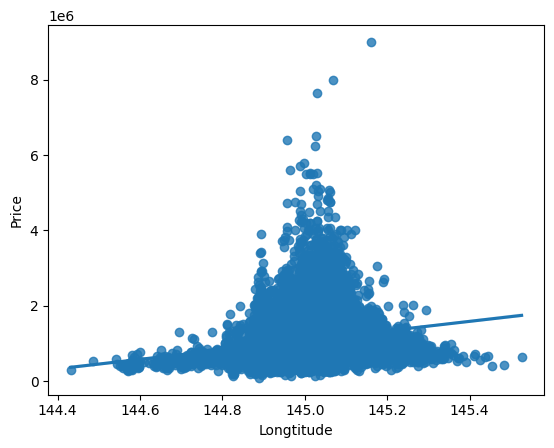

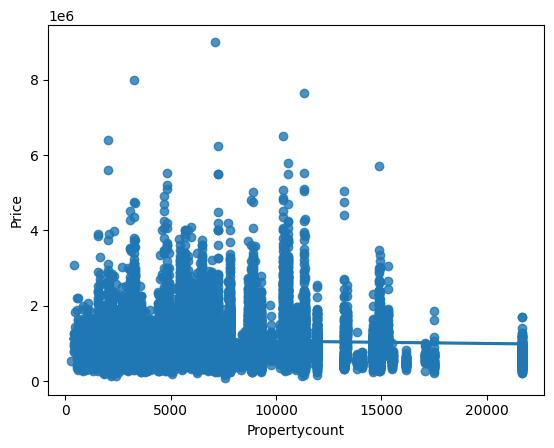

In [73]:
for column in num_cols:
  sns.regplot(data=df, x=column, y='Price')
  plt.show()

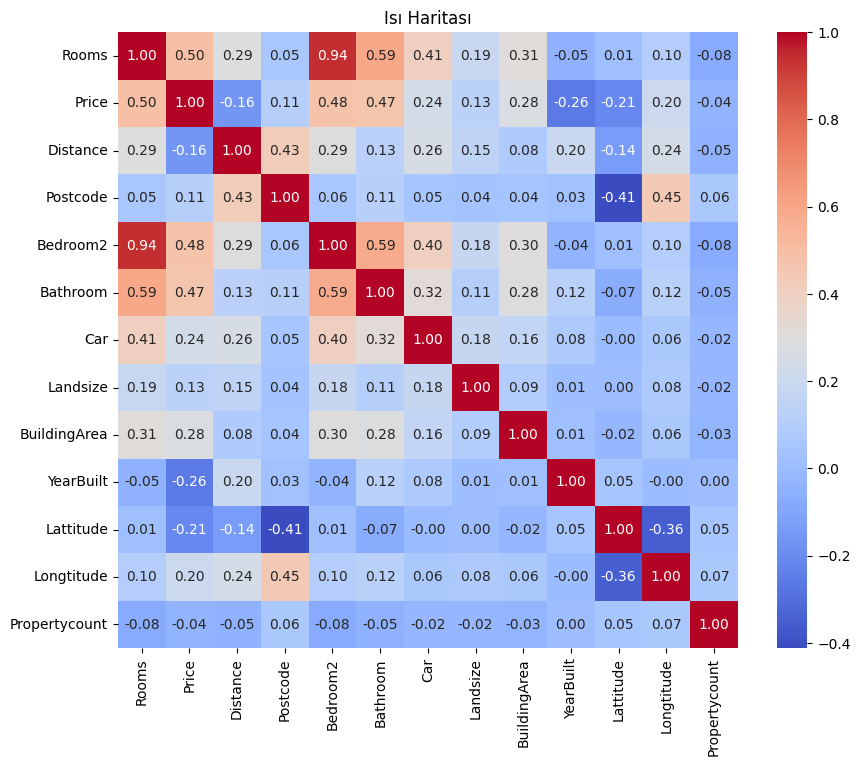

In [74]:
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
plt.title('Isı Haritası')
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            fmt='.2f')


plt.show()

In [75]:
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

#Object tipindeli verileri LabelEncoder ile Integer'e dönüştürelim.
#label_encoder = preprocessing.LabelEncoder()

#df["Suburb"] = label_encoder.fit_transform(df["Suburb"])
#df["Address"] = label_encoder.fit_transform(df["Address"])
#df["Method"] = label_encoder.fit_transform(df["Method"])
#df["SellerG"] = label_encoder.fit_transform(df["SellerG"])
#df["Date"] = label_encoder.fit_transform(df["Date"])
#df["CouncilArea"] = label_encoder.fit_transform(df["CouncilArea"])
#df["Regionname"] = label_encoder.fit_transform(df["Regionname"])
#df

In [76]:
#df.info()

In [77]:
#One Hot Encoding
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

ohe_dataframe = one_hot_encoder(df, cat_cols, drop_first=True)

ohe_dataframe.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,145.809248,1964.628938,...,0,1,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,...,0,1,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,...,0,1,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,145.809248,1964.628938,...,0,1,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,...,0,1,0,0,1,0,0,0,0,0


In [78]:
#Label Encoding
le_dataframe = df.copy()

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  le_dataframe[column_name] = label_encoder.fit_transform(df[column_name])

for col in cat_cols:
  label_encoding(col)

le_dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,12771,2,0,1480000.0,1,23,45,2.5,3067.0,...,1.0,1.0,202.0,145.809248,1964.628938,31,-37.7996,144.9984,2,4019.0
1,0,5933,2,0,1035000.0,1,23,47,2.5,3067.0,...,1.0,0.0,156.0,79.000000,1900.000000,31,-37.8079,144.9934,2,4019.0
2,0,9796,3,0,1465000.0,3,23,48,2.5,3067.0,...,2.0,0.0,134.0,150.000000,1900.000000,31,-37.8093,144.9944,2,4019.0
3,0,8989,3,0,850000.0,0,23,48,2.5,3067.0,...,2.0,1.0,94.0,145.809248,1964.628938,31,-37.7969,144.9969,2,4019.0
4,0,10567,4,0,1600000.0,4,155,49,2.5,3067.0,...,1.0,2.0,120.0,142.000000,2014.000000,31,-37.8072,144.9941,2,4019.0


In [85]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
y = df["Price"]
X = df.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (10844, 20)
Shape of x_test is (2712, 20)
Shape of y_train is (10844,)
Shape of y_test is (2712,)


In [87]:
df = le_dataframe

In [88]:
models= {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)}}

In [89]:
for key, item in models.items():
  model = item.get('model')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print("Model : {}".format(model))
  print("Mean Absolute Error : {}".format(mae))
  print("Mean Squared Error : {}".format(mse))
  print("Root Mean Square Error : {}".format(rmse))
  print("R2 Score : {}".format(r2))
  print("\n\n")

Model : Lasso()
Mean Absolute Error : 264060.29698675056
Mean Squared Error : 177293378751.0344
Root Mean Square Error : 421062.20294753887
R2 Score : 0.5814267525588301



Model : LinearRegression()
Mean Absolute Error : 264060.6548078792
Mean Squared Error : 177293334593.40143
Root Mean Square Error : 421062.15051153844
R2 Score : 0.581426856810912



Model : Ridge()
Mean Absolute Error : 264042.66955489427
Mean Squared Error : 177271232791.75333
Root Mean Square Error : 421035.90439741994
R2 Score : 0.5814790371176741



Model : ElasticNet()
Mean Absolute Error : 285962.03040524933
Mean Squared Error : 222157850513.42505
Root Mean Square Error : 471336.23933814495
R2 Score : 0.4755058897910943



Model : KNeighborsRegressor()
Mean Absolute Error : 365375.40007374634
Mean Squared Error : 310056958948.83435
Root Mean Square Error : 556827.5845796743
R2 Score : 0.2679842354338915



Model : RandomForestRegressor()
Mean Absolute Error : 165643.50588495575
Mean Squared Error : 8033367168